# **Part 1: Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('Netflix_Userbase.csv')

print(df.head())
print(df.describe())

   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  
          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     

# **Part 2: Exploratory Data Analysis (EDA)**

In [ ]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies['var'] = df['Monthly Revenue'].astype(int)

In [ ]:
X = df_dummies.drop(["var", "Monthly Revenue"], axis = 1)
y = df_dummies["var"]

In [ ]:
df.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


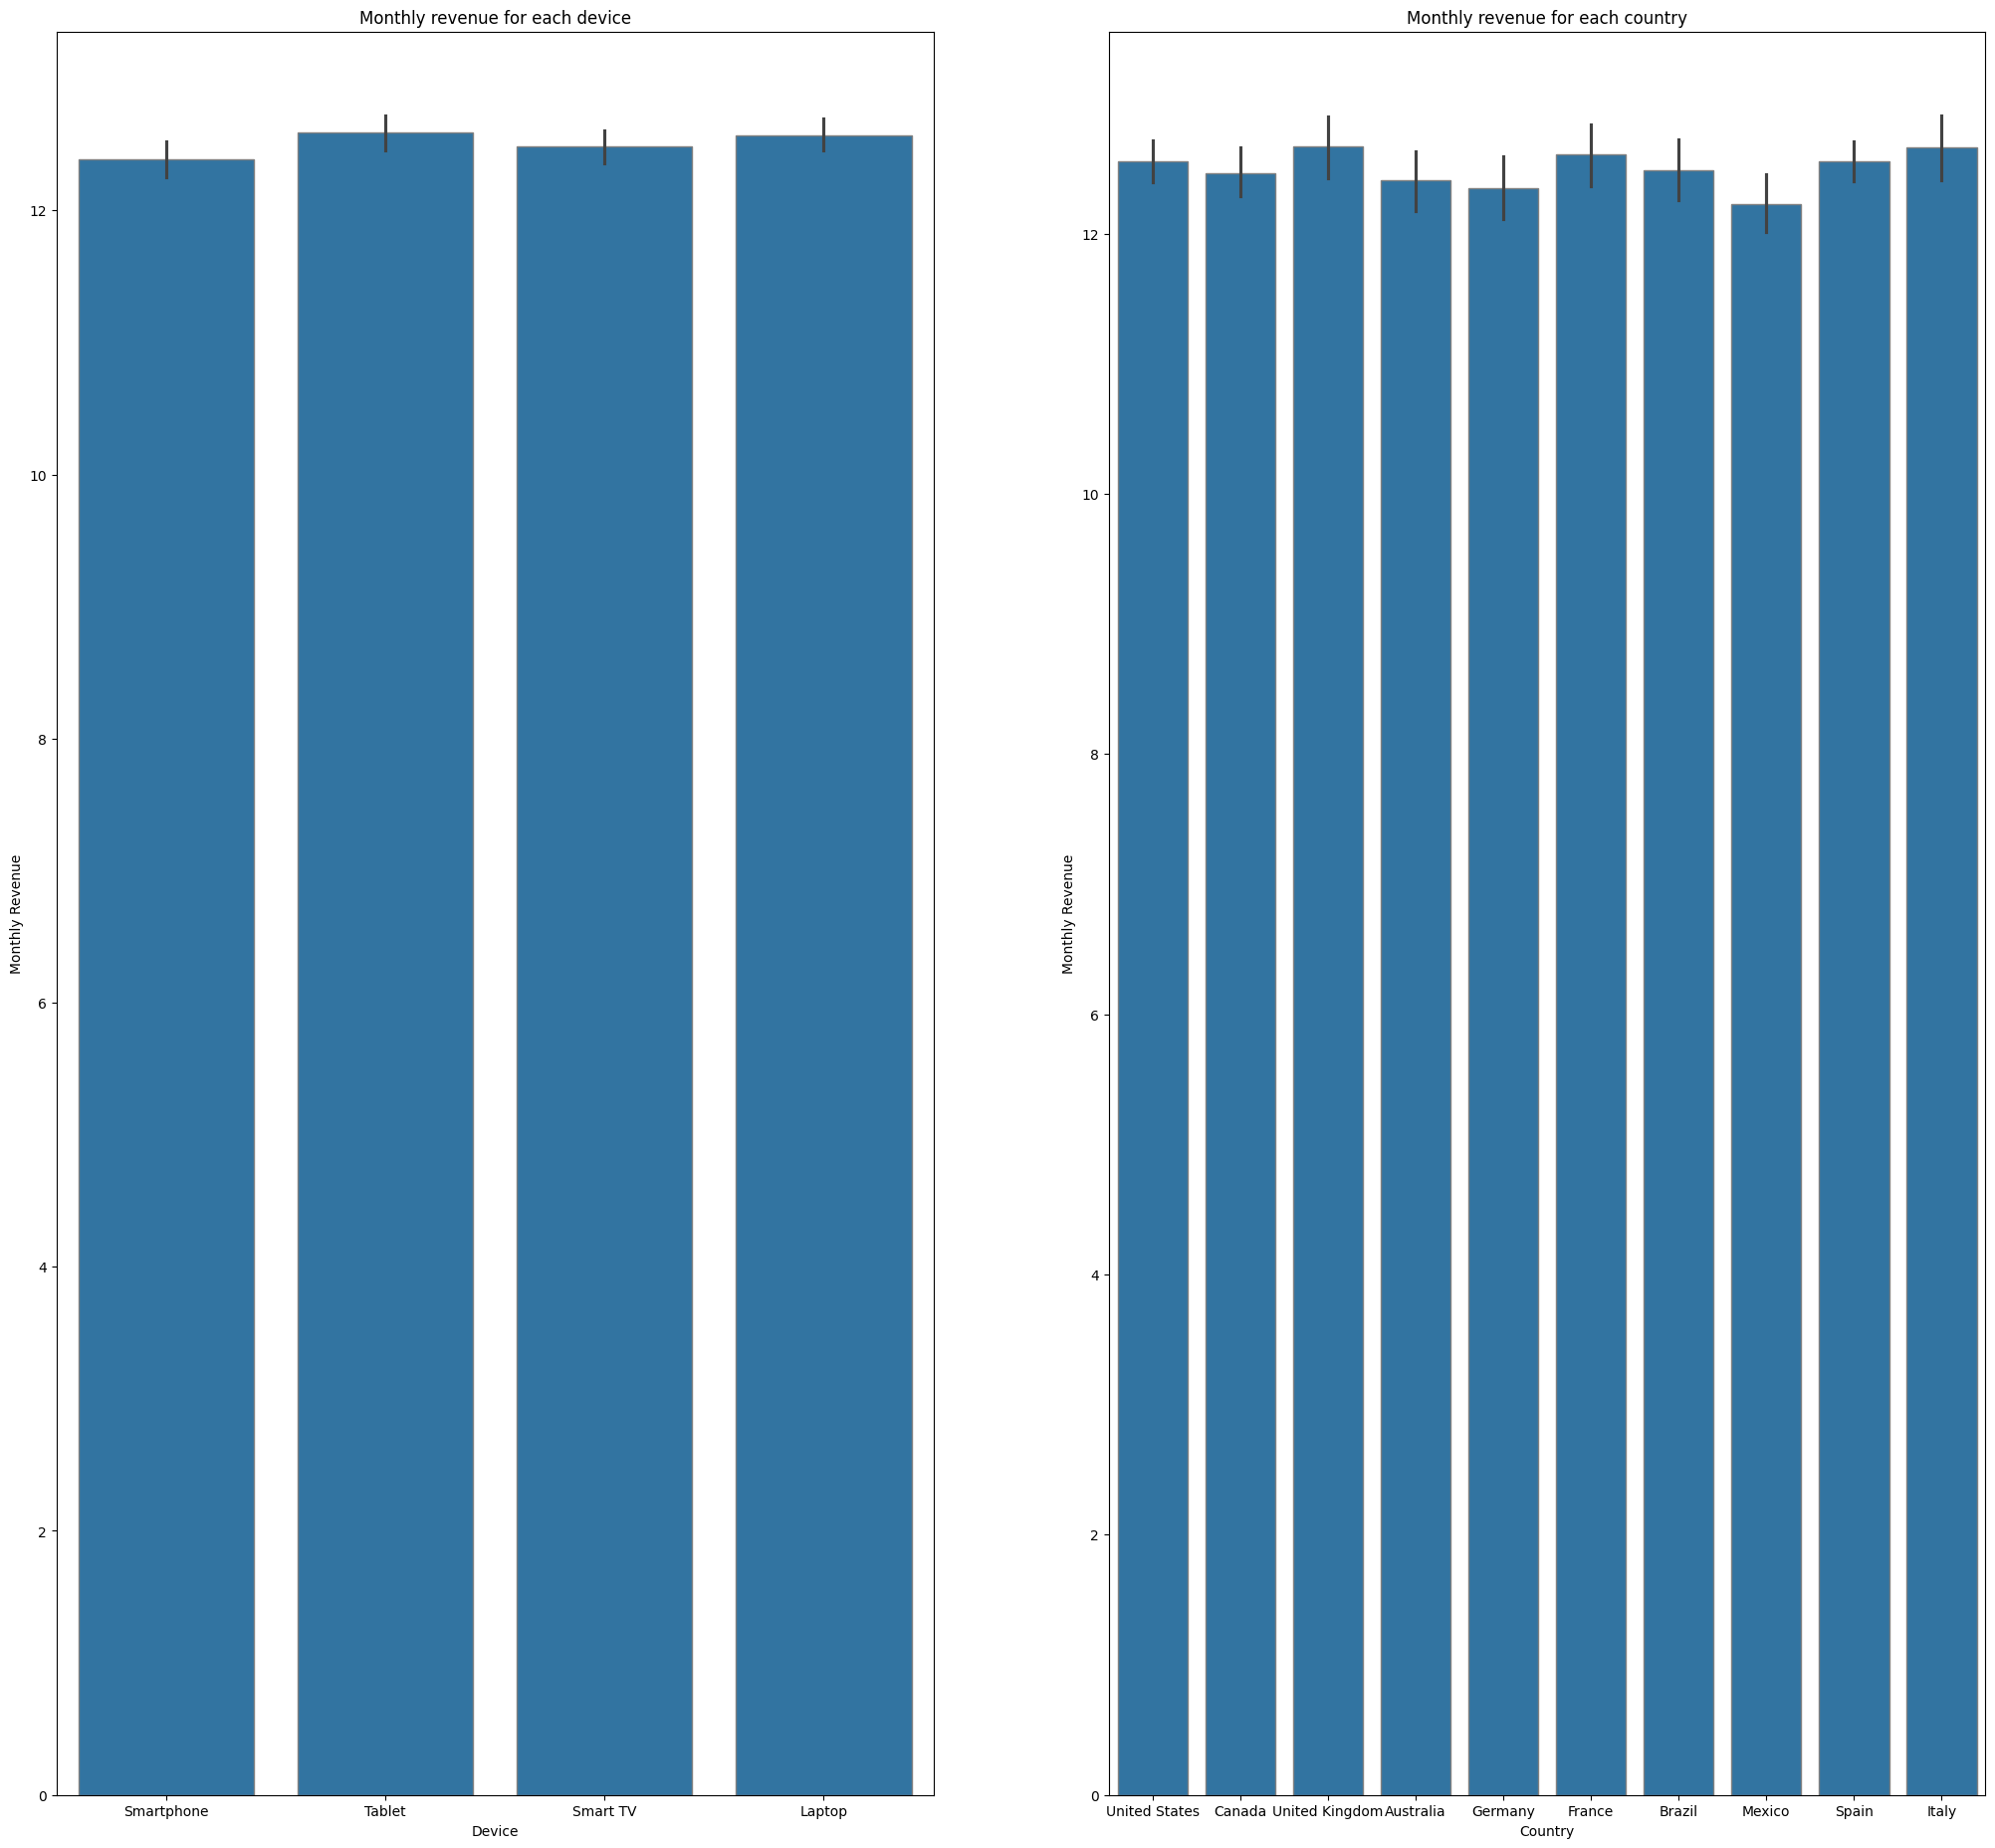

In [ ]:
plt.figure(figsize=(25, 23))

plt.subplot(1, 2, 1)
sns.barplot(x="Device", y="Monthly Revenue", data=df, edgecolor="gray")
plt.title("Monthly revenue for each device")

plt.subplot(1, 2, 2)
sns.barplot(x="Country", y="Monthly Revenue", data=df, edgecolor="gray")
plt.title("Monthly revenue for each country")

plt.show()


# **Part 3: Linear Regression Model (Predicting Monthly Revenue)**

In [ ]:
model = LinearRegression()

model.fit(X, y)

LinearRegression()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Train your model here...

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.4f}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.4f}")


R-squared: 0.1527
RMSE: 1.5150
MAE: 1.2575


# **Part 4: Logistic Regression Model (Predicting Customer Feedback)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

report = f"""
Accuracy: {accuracy}

Confusion Matrix:
{conf_matrix}

Classification Report:
{class_report}
"""

print(report)


Accuracy: 0.15

Confusion Matrix:
[[ 5 18 22 15 12 13]
 [ 9  9 25 13 10 13]
 [11 13 19 16 21 13]
 [13  7 22 16 16 14]
 [ 5 16 18 20 15 11]
 [10 13 12 12 12 11]]

Classification Report:
              precision    recall  f1-score   support

          10       0.09      0.06      0.07        85
          11       0.12      0.11      0.12        79
          12       0.16      0.20      0.18        93
          13       0.17      0.18      0.18        88
          14       0.17      0.18      0.18        85
          15       0.15      0.16      0.15        70

    accuracy                           0.15       500
   macro avg       0.14      0.15      0.15       500
weighted avg       0.15      0.15      0.15       500




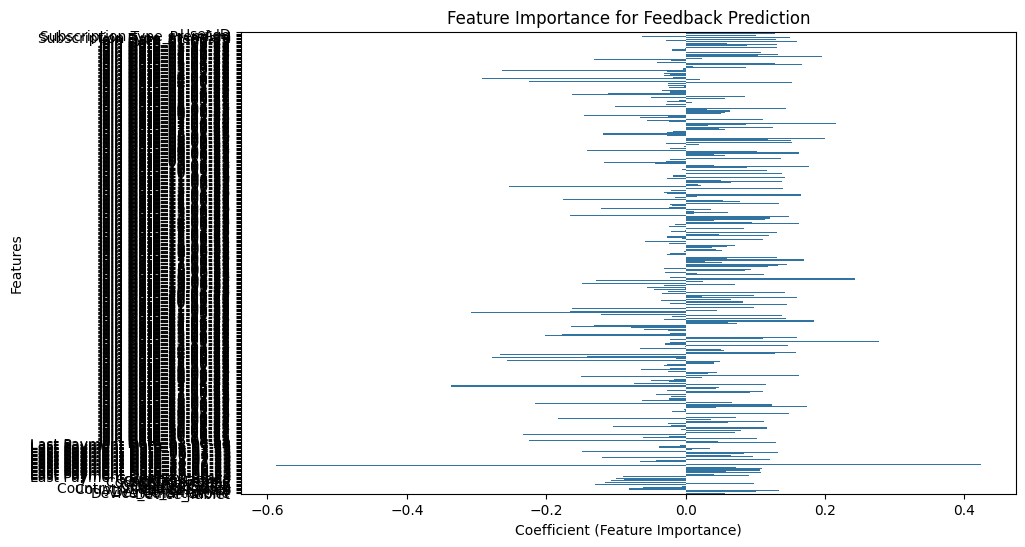

In [ ]:
feature_importance = model.coef_[0]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.xlabel("Coefficient (Feature Importance)")
plt.ylabel("Features")
plt.title("Feature Importance for Feedback Prediction")
plt.show()

# **Part 5: Comparative Analysis and Visualization**

              precision    recall  f1-score   support

          10       0.09      0.06      0.07        85
          11       0.12      0.11      0.12        79
          12       0.16      0.20      0.18        93
          13       0.17      0.18      0.18        88
          14       0.17      0.18      0.18        85
          15       0.15      0.16      0.15        70

    accuracy                           0.15       500
   macro avg       0.14      0.15      0.15       500
weighted avg       0.15      0.15      0.15       500



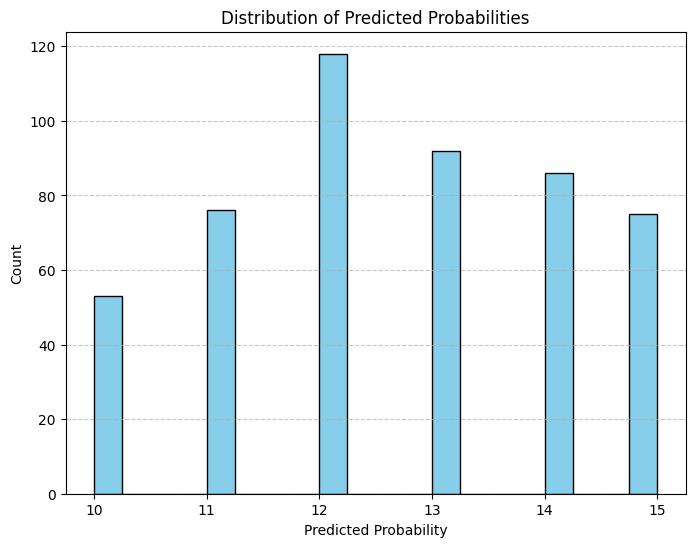

In [ ]:
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.title('Distribution of Predicted Probabilities')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()